In [1]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# observed data
z = 11
n = 14

In [3]:
# starting position
x_old = 0.2
# lists of steps
acc = list()
rej = list()
all = list()
all_colors = list()
# number of iterations
iterations = 1000
PRIOR = 'beta'

In [4]:
def prior(p, type = 'uniform'):
    """
    Calculate prior probability of parameter p

    :param p: value of parameter
    :type p: float

    :param type: type of uniform distribution
                    - uniform
                    - beta
    :type type: string

    :return: prior probability of p
    :rtype: float
    """
    if type == 'uniform':
        if 0 <= p <= 1:
            return 1.
        return 0.
    if type == 'beta':
        return beta.pdf(p, 3, 3)

def likelihood(p):
    """
    Definition of the likelihood function for a binomial

    :param p: value of parameter p
    :type p: float

    :return: likeklihood for given p
    :rtype: float
    """
    return (p**z) * ((1-p)**(n-z))

def proposal(p):
    """
    Generating a proposal value for the next step
    given the current parameter value.
    The proposal distribution is a gaussian
    having a mean: the current parameter value
    and a std of 0.1 (not to narrow, not to wide).

    :param p: current value of the parameter
    :type p: float

    :return: proposed value to step into
    :rtype: float
    """
    return norm.rvs(p, 0.1)

def accept(x_old, x_new):
    """
    Deciding whether to accept the newly proposed value
    for the parameter to step into.

    :param x_old: old value of the parameter
    :type x_old: float

    :param x_new: new value of the paramter
    :type x_new: float

    :return: Whether to step into new value
    :rtype: bool
    """
    return np.random.uniform(0,1) < (x_new / x_old)


# executing the MCMC
for i in range(iterations):
    # propose a new value
    x_new = proposal(x_old)
    # calculate likelihoods of current and proposed value
    x_old_likelihood = likelihood(x_old)
    x_new_likelihood = likelihood(x_new)

    add_color = None
    # check whether to accept newly proposed value
    if accept(prior(x_old, type = PRIOR) * x_old_likelihood, prior(x_new, type = PRIOR) * x_new_likelihood):
        x_old = x_new
        acc.append(x_new)
        add_color = 'green'
    else:
        rej.append(x_new)
        add_color = 'red'

    all.append(x_new)
    all_colors.append(add_color)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


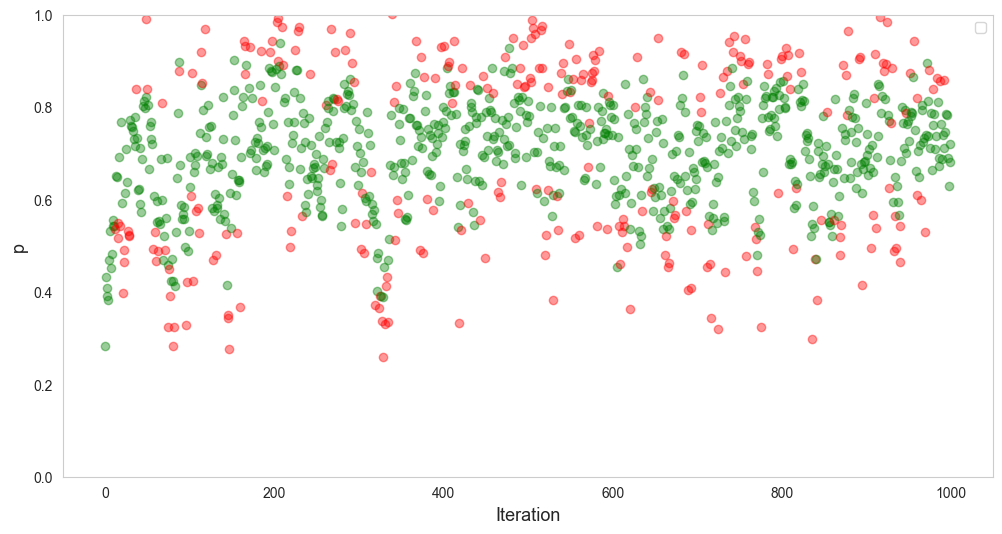

In [5]:
all_list = all
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
for i in range(len(all_list)):
    color = 'g.' if all_colors[i] == 'green' else 'rx'
    ax.scatter([i], [all[i]],c = all_colors[i], alpha = 0.4)
ax.set_xlabel("Iteration", fontsize = 13)
ax.set_ylabel("p", fontsize = 13)
ax.set_ylim((0,1))
ax.grid()
ax.legend()
plt.savefig(f'mcmc_plots/steps_1d_prior_{PRIOR}.pdf')

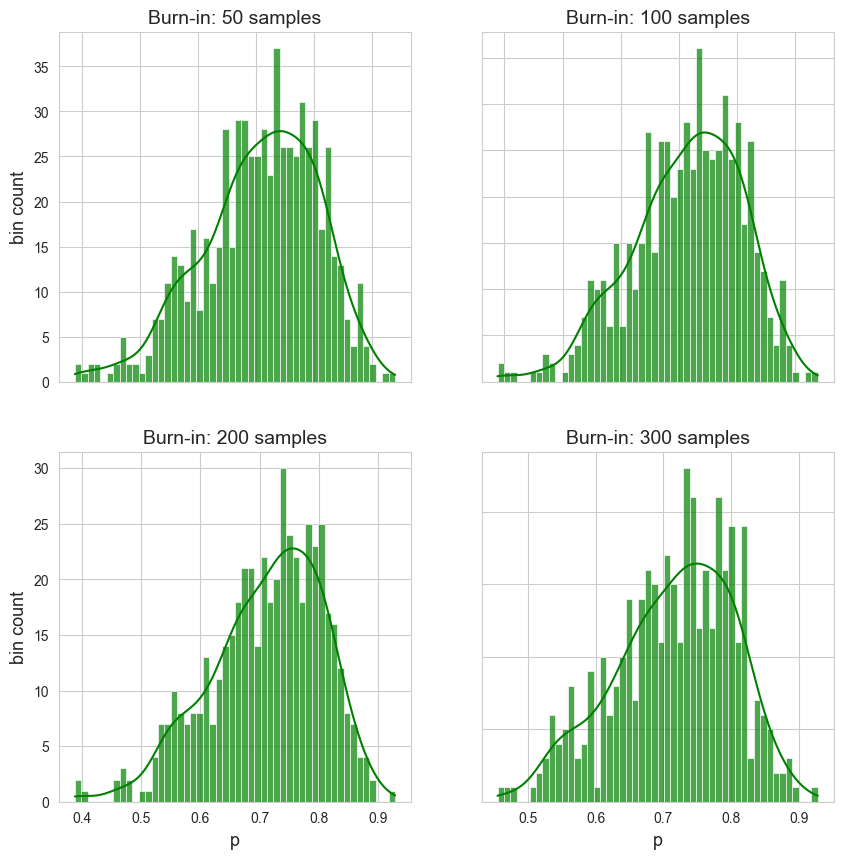

In [6]:
burn_50 = acc[50:]
burn_100 = acc[100:]
burn_200 = acc[200:]
burn_300 = acc[300:]

fig, axs = plt.subplots(2, 2, figsize=(10,10))
# fig.suptitle("Figure 2: Posterior estimation with different burn-in periods")
sns.histplot(burn_50, bins = 50, ax = axs[0,0], kde=True, color = 'green', alpha = 0.7)
axs[0, 0].set_title('Burn-in: 50 samples', fontsize = 14)
sns.histplot(burn_100, bins = 50, ax = axs[0,1], kde=True, color = 'green', alpha = 0.7)
axs[0, 1].set_title('Burn-in: 100 samples', fontsize = 14)
sns.histplot(burn_200, bins = 50, ax = axs[1,0], kde=True, color = 'green', alpha = 0.7)
axs[1, 0].set_title('Burn-in: 200 samples', fontsize = 14)
sns.histplot(burn_300, bins = 50, ax = axs[1,1], kde=True, color = 'green', alpha = 0.7)
axs[1, 1].set_title('Burn-in: 300 samples', fontsize = 14)

for ax in axs.flat:
    ax.set_xlabel('p', fontsize = 13)
    ax.set_ylabel('bin count', fontsize = 13)
    ax.label_outer()

plt.savefig(f'mcmc_plots/posterior_1d_prior_{PRIOR}.pdf')